In [1]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('Data.xlsx')
df_plants = pd.read_excel(xls, 'plants')
df_flight_dates = pd.read_excel(xls, 'flight dates')
df_planting = pd.read_excel(xls, 'planting')
df_weather = pd.read_excel(xls, 'weather')

In [3]:
df_plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [4]:
#filling NaN values inside Leaves column with the mean value
df_plants['Leaves'].fillna(value=df_plants['Leaves'].mean(),inplace=True)

In [5]:
#Dropping columns 'Diameter Ratio' and 'Density' as instructed in the brief
df_plants.drop(columns=['Diameter Ratio','Density (kg/L)'],inplace=True)

In [6]:
df_plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,17.07,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,17.07,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,17.07,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,17.07,413.0,1172,2020-10-20,NaT,NaN


In [7]:
#removing all the empty rows for 'Remove' column.
df_plants = df_plants.loc[df_plants['Remove'] != 'r']

In [8]:
df_plants

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,17.07,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,17.07,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,17.07,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,17.07,413.0,1172,2020-10-20,NaT,NaN


Merging Flight Date column from 'flight date' data with 'plants' data where missing.

In [9]:
df_plants= df_flight_dates.join(df_plants.set_index('Batch Number'), on='Batch Number',lsuffix='.')

In [10]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaT,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,NaT,4,621.0,188.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,1,680.0,273.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,2,583.0,203.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaT,NaN
49,693,2020-09-10,NaT,3,609.0,213.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaT,NaN


In [11]:
df_plants.drop(columns=['Flight Date'],inplace=True)

In [12]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaN
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,NaT,4,621.0,188.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,1,680.0,273.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,2,583.0,203.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaN
49,693,2020-09-10,NaT,3,609.0,213.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaN


In [13]:
df_plants.reset_index(inplace=True)

In [14]:
df_plants.drop(['index'],axis=1,inplace=True)

In [15]:
df_plants

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,185.0,208,2020-04-30,NaN
1,402,2020-04-30,2020-04-11,4,15.0,NaN,NaN,NaN,11.00,156.0,208,2020-04-30,NaN
2,402,2020-04-30,2020-04-11,1,16.0,NaN,NaN,NaN,12.00,137.0,208,2020-04-30,NaN
3,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,10.00,225.0,208,2020-04-30,NaN
4,402,2020-04-30,2020-04-11,3,15.0,NaN,NaN,NaN,11.00,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,693,2020-09-10,NaT,4,621.0,188.0,120.0,85.0,17.07,780.0,85,2020-09-25,NaN
3330,693,2020-09-10,NaT,1,680.0,273.0,120.0,90.0,17.07,834.0,85,2020-09-25,NaN
3331,693,2020-09-10,NaT,2,583.0,203.0,115.0,92.0,17.07,726.0,85,2020-09-25,NaN
3332,693,2020-09-10,NaT,3,609.0,213.0,120.0,90.0,17.07,769.0,85,2020-09-25,NaN


In [16]:
df_weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


<AxesSubplot:xlabel='ET0_Result', ylabel='Air Temperature [avg]'>

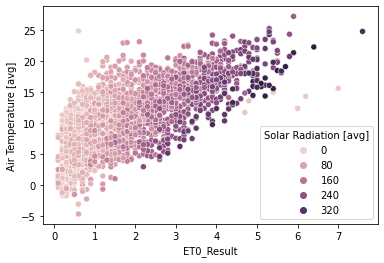

In [62]:
# plt.scatter(df_weather["Air Temperature [avg]"],df_weather["Solar Radiation [avg]"], df_weather["ET0_Result"])
sns.scatterplot(data=df_weather, x='ET0_Result', y='Air Temperature [avg]', hue='Solar Radiation [avg]')

Renaming two columns inside the 'weather data' that will be used as features and get merged with 'plants' data

In [17]:
df_weather.rename(columns={'ET0 [result]':'ET0_Result'},inplace=True)
df_weather.rename(columns={"Unnamed: 0": "Weather Date"},inplace=True)

In [18]:
df_weather

,Weather Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0_Result
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


In [19]:
df_ET_Result = df_weather[['Weather Date','ET0_Result']]

In [20]:
df_ET_Result

,Weather Date,ET0_Result
0,2014-05-14,NaN
1,2014-05-15,3.6
2,2014-05-16,2.9
3,2014-05-17,3.6
4,2014-05-18,4.2
...,...,...
2551,2021-05-17,NaN
2552,2021-05-17,NaN
2553,2021-05-18,3.4
2554,2021-05-19,3.0


In [21]:
df_ET_Result.iloc[2119]

Weather Date    2020-04-11 00:00:00
ET0_Result                      3.7
Name: 2119, dtype: object

In [22]:
df_ET_Result.iloc[2257]

Weather Date    2020-08-27 00:00:00
ET0_Result                      1.6
Name: 2257, dtype: object

Keeping 'weather' data just for the year 2020

In [23]:
df_final_weather = df_ET_Result.iloc[2119:2258]

In [24]:
df_final_weather.reset_index(inplace=True)

In [25]:
df_final_weather.drop(['index'],axis=1,inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_final_weather

,Weather Date,ET0_Result
0,2020-04-11,3.7
1,2020-04-12,3.6
2,2020-04-13,2.4
3,2020-04-14,2.5
4,2020-04-15,3.2
...,...,...
134,2020-08-23,3.1
135,2020-08-24,3.5
136,2020-08-25,2.8
137,2020-08-26,3.0


Merging the selected data from 'weather' dataset with 'plants' data to be used as feature for training the model

In [27]:
df_plants= df_final_weather.join(df_plants.set_index('Plant Date'), on='Weather Date',rsuffix='.')

In [28]:
df_plants

,Weather Date,ET0_Result,Batch Number,Flight Date.,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,NaN
0,2020-04-11,3.7,402.0,2020-04-30,4.0,15.0,NaN,NaN,NaN,11.0,156.0,208.0,2020-04-30,NaN
0,2020-04-11,3.7,402.0,2020-04-30,1.0,16.0,NaN,NaN,NaN,12.0,137.0,208.0,2020-04-30,NaN
0,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,225.0,208.0,2020-04-30,NaN
0,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,11.0,157.0,208.0,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2020-08-23,3.1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
135,2020-08-24,3.5,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
136,2020-08-25,2.8,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
137,2020-08-26,3.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [29]:
df_plants.reset_index(inplace=True)
df_plants.drop(['index'],axis=1,inplace=True)

In [30]:
df_plants

,Weather Date,ET0_Result,Batch Number,Flight Date.,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,NaN
1,2020-04-11,3.7,402.0,2020-04-30,4.0,15.0,NaN,NaN,NaN,11.0,156.0,208.0,2020-04-30,NaN
2,2020-04-11,3.7,402.0,2020-04-30,1.0,16.0,NaN,NaN,NaN,12.0,137.0,208.0,2020-04-30,NaN
3,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,225.0,208.0,2020-04-30,NaN
4,2020-04-11,3.7,402.0,2020-04-30,3.0,15.0,NaN,NaN,NaN,11.0,157.0,208.0,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,2020-08-23,3.1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3397,2020-08-24,3.5,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3398,2020-08-25,2.8,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3399,2020-08-26,3.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [31]:
df_planting.isna().sum()

Crop               420
Column2           2373
Column3           2373
Plant_Date         420
Column1           2373
Region             420
Column4           2373
Planting_Batch     551
Volume_Planted     552
Planting_Wk        420
dtype: int64

Further data cleaning to remove unnecessary columns 

In [32]:
df_planting.drop(['Column2','Column3','Column1','Column4'],axis=1,inplace=True)

In [33]:
df_planting.dropna(inplace=True)

In [34]:
df_planting

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


In [35]:
df_planting.iloc[281]

Crop                                3
Plant_Date        2020-04-11 00:00:00
Region                            0.0
Planting_Batch                    401
Volume_Planted                52920.0
Planting_Wk                      15.0
Name: 281, dtype: object

In [36]:
df_final_planting = df_planting.iloc[281:]
df_final_planting

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
281,3,2020-04-11 00:00:00,0.0,401,52920.0,15.0
282,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0
283,4,2020-04-13 00:00:00,0.0,819,48710.0,16.0
284,0,2020-04-03 00:00:00,0.0,274,215192.0,14.0
285,0,2020-04-02 00:00:00,0.0,275,151077.0,14.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


In [37]:
df_plants = df_final_planting.join(df_plants.set_index('Batch Number'), on='Planting_Batch',rsuffix='.')

In [38]:
df_plants.reset_index(inplace=True)
df_plants.drop(['index'],axis=1,inplace=True)

In [39]:
df_plants.isna().sum()

Crop                       0
Plant_Date                 0
Region                     0
Planting_Batch             0
Volume_Planted             0
Planting_Wk                0
Weather Date            1490
ET0_Result              1490
Flight Date.            1490
Class                   1490
Fresh Weight (g)        1491
Head Weight (g)         1588
Radial Diameter (mm)    1588
Polar Diameter (mm)     1588
Leaves                  1490
Leaf Area (cm^2)        1491
Square ID               1490
Check Date              1490
Remove                  4784
dtype: int64

In [40]:
df_plants

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,Weather Date,ET0_Result,Flight Date.,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,3,2020-04-11 00:00:00,0.0,401,52920.0,15.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,NaN
2,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,4.0,15.0,NaN,NaN,NaN,11.0,156.0,208.0,2020-04-30,NaN
3,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,1.0,16.0,NaN,NaN,NaN,12.0,137.0,208.0,2020-04-30,NaN
4,3,2020-04-11 00:00:00,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,3.0,15.0,NaN,NaN,NaN,10.0,225.0,208.0,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4780,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4781,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4782,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [41]:
df_plants.dtypes

Crop                            object
Plant_Date                      object
Region                         float64
Planting_Batch                  object
Volume_Planted                 float64
Planting_Wk                    float64
Weather Date            datetime64[ns]
ET0_Result                     float64
Flight Date.            datetime64[ns]
Class                          float64
Fresh Weight (g)               float64
Head Weight (g)                float64
Radial Diameter (mm)           float64
Polar Diameter (mm)            float64
Leaves                         float64
Leaf Area (cm^2)               float64
Square ID                      float64
Check Date              datetime64[ns]
Remove                          object
dtype: object

In [42]:
df_plants['Plant_Date'] = pd.to_datetime(df_plants['Plant_Date'])

In [43]:
df_plants.dropna(subset=[n for n in df_plants if n != 'Remove'],inplace= True)

In [44]:
df_plants.reset_index(inplace=True)
df_plants.drop(['index'],axis=1,inplace=True)

In [45]:
df_plants

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,Weather Date,ET0_Result,Flight Date.,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,2.0,213.0,13.0,55.0,55.0,17.07,730.0,570.0,2020-05-22,NaN
1,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,5.0,179.0,10.0,40.0,40.0,17.07,643.0,570.0,2020-05-22,NaN
2,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,5.0,183.0,13.0,50.0,50.0,17.07,647.0,570.0,2020-05-22,NaN
3,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,3.0,176.0,7.0,40.0,40.0,17.07,694.0,570.0,2020-05-22,NaN
4,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,1.0,192.0,22.0,70.0,70.0,17.07,730.0,570.0,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,1.0,81.0,8.0,36.0,40.0,17.07,247.0,290.0,2020-09-17,NaN
3192,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,1.0,103.0,8.0,40.0,50.0,17.07,211.0,290.0,2020-09-17,NaN
3193,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,3.0,132.0,6.0,40.0,40.0,17.07,337.0,290.0,2020-09-17,NaN
3194,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,2.0,183.0,10.0,50.0,45.0,17.07,370.0,290.0,2020-09-17,NaN


Creating a new column for the difference in 'plant date' and 'check date', assuming this is the time crop takes to grow about 95%.

In [46]:
df_plants['Days to Yield']  = (df_plants['Check Date'] - df_plants['Plant_Date']).dt.days

In [47]:
df_plants

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk,Weather Date,ET0_Result,Flight Date.,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Yield
0,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,2.0,213.0,13.0,55.0,55.0,17.07,730.0,570.0,2020-05-22,NaN,41
1,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,5.0,179.0,10.0,40.0,40.0,17.07,643.0,570.0,2020-05-22,NaN,41
2,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,5.0,183.0,13.0,50.0,50.0,17.07,647.0,570.0,2020-05-22,NaN,41
3,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,3.0,176.0,7.0,40.0,40.0,17.07,694.0,570.0,2020-05-22,NaN,41
4,3,2020-04-11,0.0,402,155232.0,15.0,2020-04-11,3.7,2020-04-30,1.0,192.0,22.0,70.0,70.0,17.07,730.0,570.0,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,1.0,81.0,8.0,36.0,40.0,17.07,247.0,290.0,2020-09-17,NaN,40
3192,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,1.0,103.0,8.0,40.0,50.0,17.07,211.0,290.0,2020-09-17,NaN,40
3193,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,3.0,132.0,6.0,40.0,40.0,17.07,337.0,290.0,2020-09-17,NaN,40
3194,3,2020-08-08,0.0,693,133056.0,32.0,2020-08-08,4.3,2020-09-10,2.0,183.0,10.0,50.0,45.0,17.07,370.0,290.0,2020-09-17,NaN,40


Breaking dates into three new columns for '_days','_month', and '_year' for Flight Date, Check Date, Weather date, and Plant Date. To convert them into int data type.

In [48]:
df_plants['Plant_day'] = df_plants['Plant_Date'].dt.day
df_plants['Plant_month'] = df_plants['Plant_Date'].dt.month
df_plants['Plant_year'] = df_plants['Plant_Date'].dt.year

In [49]:
df_plants['Flight_day'] = df_plants['Flight Date.'].dt.day
df_plants['Flight_month'] = df_plants['Flight Date.'].dt.month
df_plants['Flight_year'] = df_plants['Flight Date.'].dt.year

In [50]:
df_plants['Check_day'] = df_plants['Check Date'].dt.day
df_plants['Check_month'] = df_plants['Check Date'].dt.month
df_plants['Check_year'] = df_plants['Check Date'].dt.year

In [51]:
df_plants['Weather_day'] = df_plants['Weather Date'].dt.day
df_plants['Weather_month'] = df_plants['Weather Date'].dt.month
df_plants['Weather_year'] = df_plants['Weather Date'].dt.year

In [52]:
df_plants.drop(['Weather Date', 'Plant_Date','Flight Date.','Check Date'],axis=1,inplace=True)

In [53]:
df_plants

,Crop,Region,Planting_Batch,Volume_Planted,Planting_Wk,ET0_Result,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),...,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year,Weather_day,Weather_month,Weather_year
0,3,0.0,402,155232.0,15.0,3.7,2.0,213.0,13.0,55.0,...,2020,30,4,2020,22,5,2020,11,4,2020
1,3,0.0,402,155232.0,15.0,3.7,5.0,179.0,10.0,40.0,...,2020,30,4,2020,22,5,2020,11,4,2020
2,3,0.0,402,155232.0,15.0,3.7,5.0,183.0,13.0,50.0,...,2020,30,4,2020,22,5,2020,11,4,2020
3,3,0.0,402,155232.0,15.0,3.7,3.0,176.0,7.0,40.0,...,2020,30,4,2020,22,5,2020,11,4,2020
4,3,0.0,402,155232.0,15.0,3.7,1.0,192.0,22.0,70.0,...,2020,30,4,2020,22,5,2020,11,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,0.0,693,133056.0,32.0,4.3,1.0,81.0,8.0,36.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3192,3,0.0,693,133056.0,32.0,4.3,1.0,103.0,8.0,40.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3193,3,0.0,693,133056.0,32.0,4.3,3.0,132.0,6.0,40.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3194,3,0.0,693,133056.0,32.0,4.3,2.0,183.0,10.0,50.0,...,2020,10,9,2020,17,9,2020,8,8,2020


<AxesSubplot:xlabel='ET0_Result', ylabel='Leaf Area (cm^2)'>

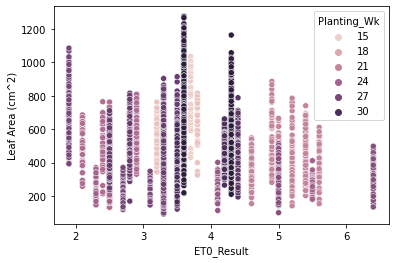

In [103]:
sns.scatterplot(data=df_plants, x='ET0_Result', y='Leaf Area (cm^2)', hue='Planting_Wk')

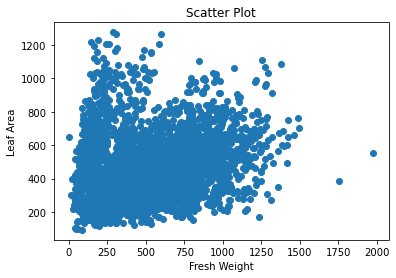

In [98]:
plt.scatter(df_plants['Fresh Weight (g)'], df_plants['Leaf Area (cm^2)'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Fresh Weight')
plt.ylabel('Leaf Area')
  
plt.show()

Data is ready to be processed

In [71]:
X = df_plants.drop(['Head Weight (g)','Radial Diameter (mm)','Polar Diameter (mm)'],axis=1)

In [72]:
X.drop(['Remove'],axis=1,inplace=True)

In [73]:
X

,Crop,Region,Planting_Batch,Volume_Planted,Planting_Wk,ET0_Result,Class,Fresh Weight (g),Leaves,Leaf Area (cm^2),...,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year,Weather_day,Weather_month,Weather_year
0,3,0.0,402,155232.0,15.0,3.7,2.0,213.0,17.07,730.0,...,2020,30,4,2020,22,5,2020,11,4,2020
1,3,0.0,402,155232.0,15.0,3.7,5.0,179.0,17.07,643.0,...,2020,30,4,2020,22,5,2020,11,4,2020
2,3,0.0,402,155232.0,15.0,3.7,5.0,183.0,17.07,647.0,...,2020,30,4,2020,22,5,2020,11,4,2020
3,3,0.0,402,155232.0,15.0,3.7,3.0,176.0,17.07,694.0,...,2020,30,4,2020,22,5,2020,11,4,2020
4,3,0.0,402,155232.0,15.0,3.7,1.0,192.0,17.07,730.0,...,2020,30,4,2020,22,5,2020,11,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3,0.0,693,133056.0,32.0,4.3,1.0,81.0,17.07,247.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3192,3,0.0,693,133056.0,32.0,4.3,1.0,103.0,17.07,211.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3193,3,0.0,693,133056.0,32.0,4.3,3.0,132.0,17.07,337.0,...,2020,10,9,2020,17,9,2020,8,8,2020
3194,3,0.0,693,133056.0,32.0,4.3,2.0,183.0,17.07,370.0,...,2020,10,9,2020,17,9,2020,8,8,2020


In [74]:
y = df_plants[['Head Weight (g)','Radial Diameter (mm)','Polar Diameter (mm)','Days to Yield']]

In [75]:
y

,Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Days to Yield
0,13.0,55.0,55.0,41
1,10.0,40.0,40.0,41
2,13.0,50.0,50.0,41
3,7.0,40.0,40.0,41
4,22.0,70.0,70.0,41
...,...,...,...,...
3191,8.0,36.0,40.0,40
3192,8.0,40.0,50.0,40
3193,6.0,40.0,40.0,40
3194,10.0,50.0,45.0,40


In [76]:
scaled = StandardScaler()

In [77]:
X = scaled.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

Using Linear Regression without cross validation and gridsearch

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)

In [83]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8648166348903645


Using Linear Regression with 5 fold cross-validation and GridSearch for finding the best parameters.

In [89]:
lr_params = {'fit_intercept':[True,False], 'copy_X':[True, False]}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
clf = GridSearchCV(estimator=lr, param_grid = lr_params, cv = kf, scoring='r2', n_jobs = 1, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'copy_X': True, 'fit_intercept': True}
0.8618818405289268


In [99]:
best_params = {'fit_intercept':[clf.best_params_['fit_intercept']],'copy_X':[clf.best_params_['copy_X']]}
clfx = GridSearchCV(estimator=lr, param_grid = best_params, cv = kf, scoring='r2', n_jobs = -1, return_train_score=True)
clfx.fit(X_train, y_train)
y_pred = clfx.predict(X_test)
print(r2_score(y_test,y_pred))

0.8648166348903645


# Random Forest Regressor

Using Random Forest regressor without cross-validation and GridSearch

In [101]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print(r2_score(y_test,y_pred))

0.9303634487250737


Using Random Forest regressor with cross-validation and GridSearch

In [146]:
rfr = RandomForestRegressor()
rfr_params = {'n_estimators': [5,20,50,100],'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
              'min_samples_split': [2, 6, 10],'min_samples_leaf': [1, 3, 4],'bootstrap': [True, False]}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
rgrssor = GridSearchCV(estimator=rfr, param_grid = rfr_params, cv = kf, scoring='r2', n_jobs = -1)
rgrssor.fit(X_train, y_train)
print(rgrssor.best_params_)
print(rgrssor.best_score_)

{'bootstrap': True, 'max_depth': 110, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9397168730956282


In [147]:
print(rgrssor.best_params_['n_estimators'])

100


In [150]:
best_rfr_params = {'n_estimators': [rgrssor.best_params_['n_estimators']],'max_features': [rgrssor.best_params_['max_features']],'max_depth': [rgrssor.best_params_['max_depth']],
              'min_samples_split': [rgrssor.best_params_['min_samples_split']],'min_samples_leaf': [rgrssor.best_params_['min_samples_leaf']],'bootstrap': [rgrssor.best_params_['bootstrap']]}
rgrssorx = GridSearchCV(estimator=rfr, param_grid = best_rfr_params, cv = kf, scoring='r2', n_jobs = -1)
rgrssorx.fit(X_train, y_train)
y_pred = rgrssorx.predict(X_test)
print("Accuracy of Random Forest Regressor on unseen data is ",r2_score(y_test,y_pred))

Accuracy of Random Forest Regressor on unseen data is  0.9417024475146569
